In [6]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [51]:
data = pd.read_csv('/content/BTC-USD.csv',index_col = "Date", parse_dates = True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-11,908.114990,919.447998,762.765015,777.757019,777.757019,310928992
2017-01-12,775.177979,826.245972,755.755981,804.833984,804.833984,222326000
2017-01-13,803.737000,829.000977,780.002991,823.984009,823.984009,168968000
2017-01-14,825.142029,835.085022,812.455994,818.411987,818.411987,93063296
2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,71013600
...,...,...,...,...,...,...
2023-01-07,16952.117188,16975.017578,16914.191406,16955.078125,16955.078125,7714767174
2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914
2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866


In [52]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2* len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00


In [53]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19248.058, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19240.536, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19242.188, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19242.188, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19239.287, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19244.167, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.738 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [54]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [55]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


# Create an array of 100 consecutive integers starting from last_index
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Predict the closing prices for the next 100 days
y_next_100_days = model.predict(n_periods=len(x_next_100_days))

# Print the predicted closing prices for the next 100 days
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 30 days:
[12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344]
Predicted closing prices for the next 100 days:
[12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.402344 12254.402344
 12254.402344 12254.402344 12254.402344 12254.

In [56]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 23817.343285568524
Testing RMSE: 29166.922368147865


Validation RMSE: 23817.343285568524
Testing RMSE: 29166.922368147865


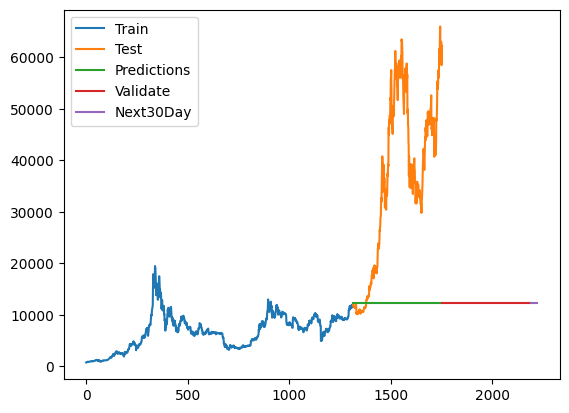

In [57]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [58]:
test_data.index

RangeIndex(start=1315, stop=1753, step=1)

In [59]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 23817.343285568524
Testing RMSE: 29166.922368147865
Validation MAPE: 54.032148420792105
Testing MAPE: 56.31612004841232
Validation MDA: 0.0
Testing MDA: 0.0
